In [221]:
import pandas as pd
import numpy as np
import re
from glob import glob
import matplotlib.pyplot as plt

In [222]:
df = pd.DataFrame(columns=[
    'date',
    'TotalCases',
    'NewCases',
    'TotalDeaths',
    'NewDeaths',
    'TotalRecovered',
    'ActiveCases',
    'Serious,Critical',
    'Tot Cases/1M pop',
    'Deaths/1M pop',
    'TotalTests',
    'Tests/ 1M pop',
])

In [223]:
date_pattern = r"\d{4}\-\d{2}\-\d{2}"
stat_files = glob("./stats/*.csv")

In [224]:
for path in sorted(stat_files):
    date_re = re.search(date_pattern, path)
    if not date_re:
        continue;
    date = date_re.group(0)
    file_df = pd.read_csv(path)
    nl_df = file_df[file_df['Country,Other'] == 'Netherlands']
    nl_df['date'] = pd.to_datetime(date)
    nl_df = nl_df.drop('Country,Other', axis=1)
    df = df.append(nl_df)


In [225]:
def to_int(val): 
    return int(val.replace(',', '')) if type(val) is str else val

df['NewCases'] = df['NewCases'].apply(to_int)
df['NewDeaths'] = df['NewDeaths'].apply(to_int)
df['TotalTests'] = df['TotalTests'].apply(to_int)
df['Tests/ 1M pop'] = df['TotalTests'].apply(to_int)
df['ActiveCases'] = df['ActiveCases'].apply(to_int)
df['TotalCases'] = df['TotalTests'].apply(to_int)

In [226]:
# df_plt = df.cumsum()
df.values.shape

(20, 13)

<Figure size 1440x504 with 0 Axes>

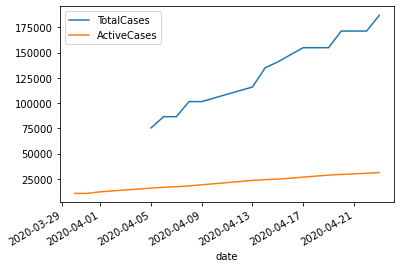

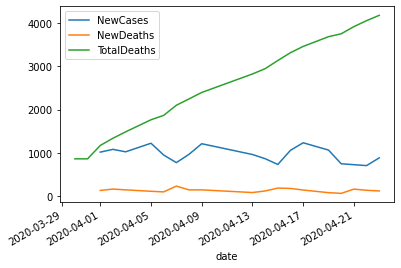

In [229]:
plt.figure(figsize=(20, 7))
df[['date', 'TotalCases', 'ActiveCases']].plot(x='date')
df[['date', 'NewCases', 'NewDeaths', 'TotalDeaths']].plot(x='date')